In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K


In [2]:
# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Parameters
latent_dim = 64  # Latent space dimension
epochs = 10
batch_size = 128

In [4]:
# Define Normal Autoencoder
def build_autoencoder():
    # Encoder
    encoder_inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_inputs)
    x = layers.MaxPooling2D(2, padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2, padding='same')(x)
    x = layers.Flatten()(x)
    latent = layers.Dense(latent_dim, activation='relu')(x)
    encoder = models.Model(encoder_inputs, latent, name='encoder')

    # Decoder
    decoder_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7*7*64, activation='relu')(decoder_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    decoder_outputs = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

    # Autoencoder
    autoencoder = models.Model(encoder_inputs, decoder(encoder(encoder_inputs)), name='autoencoder')
    return encoder, decoder, autoencoder

encoder, decoder, autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, x_test))

# Evaluate
loss = autoencoder.evaluate(x_test, x_test)
print(f"Normal Autoencoder Test Loss: {loss}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.2778 - val_loss: 0.0976
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0951 - val_loss: 0.0863
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0864 - val_loss: 0.0833
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0832 - val_loss: 0.0808
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0815 - val_loss: 0.0791
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0795 - val_loss: 0.0779
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0781 - val_loss: 0.0771
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0773 - val_loss: 0.0769
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0768 - val_loss: 0.0764
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0764 - val_loss: 0.0754
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0748
Normal Autoencoder Test Loss: 0.07541674375534058


In [5]:
# Add noise to training data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build Denoising Autoencoder (same architecture as normal autoencoder)
encoder_denoise, decoder_denoise, autoencoder_denoise = build_autoencoder()
autoencoder_denoise.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder_denoise.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_noisy, x_test))

# Evaluate
loss_denoise = autoencoder_denoise.evaluate(x_test_noisy, x_test)
print(f"Denoising Autoencoder Test Loss: {loss_denoise}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.2899 - val_loss: 0.1320
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1251 - val_loss: 0.1110
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1092 - val_loss: 0.1037
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1040 - val_loss: 0.1015
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1015 - val_loss: 0.1002
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1000 - val_loss: 0.0991
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0985 - val_loss: 0.0980
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0975 - val_loss: 0.0976
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0969 - val_loss: 0.0968
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0959 - val_loss: 0.0966
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0964
Denoising Autoencoder Test Loss: 0.09655497968196869


In [6]:


# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon




In [9]:
# Define VAE
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction


def build_vae_components():
    # Encoder
    encoder_inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_inputs)
    x = layers.MaxPooling2D(2, padding='same')(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(2, padding='same')(x)
    x = layers.Flatten()(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    z = layers.Lambda(sampling)([z_mean, z_log_var])
    encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

    # Decoder
    decoder_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7*7*64, activation='relu')(decoder_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
    x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
    decoder_outputs = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)
    decoder = models.Model(decoder_inputs, decoder_outputs, name='decoder')

    return encoder, decoder

encoder_vae, decoder_vae = build_vae_components()
vae = VAE(encoder_vae, decoder_vae)
vae.compile(optimizer='adam')

# Custom training loop
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).batch(batch_size)

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    # Train
    for step, x_batch_train in enumerate(train_dataset):
        vae.train_step(x_batch_train)
        if step % 100 == 0:
            print(f"Step {step}: loss = {vae.total_loss_tracker.result():.4f}, reconstruction_loss = {vae.reconstruction_loss_tracker.result():.4f}, kl_loss = {vae.kl_loss_tracker.result():.4f}")

    reconstruction_losses = []
    for x_batch_test in test_dataset:
        reconstruction = vae(x_batch_test)
        reconstruction_loss_batch = tf.reduce_mean(
            tf.reduce_sum(
                tf.keras.losses.binary_crossentropy(x_batch_test, reconstruction), axis=(1, 2)
            )
        )
        reconstruction_losses.append(reconstruction_loss_batch.numpy())
    vae_reconstruction_loss = np.mean(reconstruction_losses)
    print(f"VAE Reconstruction Test Loss: {vae_reconstruction_loss:.4f}")



Epoch 1/10
Step 0: loss = 547.0151, reconstruction_loss = 546.6083, kl_loss = 0.4068
Step 100: loss = 252.8608, reconstruction_loss = 245.3358, kl_loss = 7.5249
Step 200: loss = 216.5104, reconstruction_loss = 206.2300, kl_loss = 10.2804
Step 300: loss = 196.2525, reconstruction_loss = 183.3498, kl_loss = 12.9027
Step 400: loss = 180.9644, reconstruction_loss = 165.4965, kl_loss = 15.4679
VAE Reconstruction Test Loss: 98.6122

Epoch 2/10
Step 0: loss = 172.7638, reconstruction_loss = 155.9894, kl_loss = 16.7743
Step 100: loss = 163.4853, reconstruction_loss = 145.2191, kl_loss = 18.2661
Step 200: loss = 156.4987, reconstruction_loss = 137.1111, kl_loss = 19.3874
Step 300: loss = 150.9686, reconstruction_loss = 130.7421, kl_loss = 20.2263
Step 400: loss = 146.5552, reconstruction_loss = 125.6614, kl_loss = 20.8937
VAE Reconstruction Test Loss: 83.5329

Epoch 3/10
Step 0: loss = 143.9312, reconstruction_loss = 122.6635, kl_loss = 21.2676
Step 100: loss = 140.6027, reconstruction_loss = 

In [10]:
# Generate 5 noise vectors
num_samples = 5
noise_vectors = np.random.normal(loc=5.0, scale=1.0, size=(num_samples, latent_dim))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


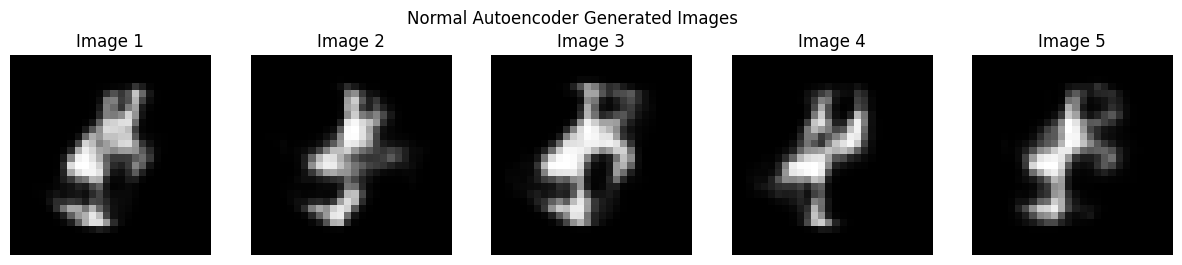

In [14]:
# Generate images
generated_images = decoder.predict(noise_vectors)
generated_images = generated_images.reshape(num_samples, 28, 28)

# Plot images
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.suptitle("Normal Autoencoder Generated Images")# Generate images
generated_images_denoise = decoder_denoise.predict(noise_vectors)
generated_images_denoise = generated_images_denoise.reshape(num_samples, 28, 28)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


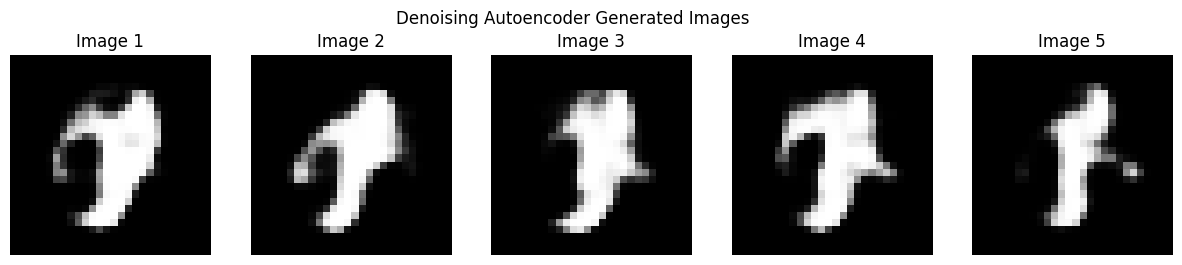

In [12]:
# Generate images
generated_images_denoise = decoder_denoise.predict(noise_vectors)
generated_images_denoise = generated_images_denoise.reshape(num_samples, 28, 28)

# Plot images
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(generated_images_denoise[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.suptitle("Denoising Autoencoder Generated Images")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


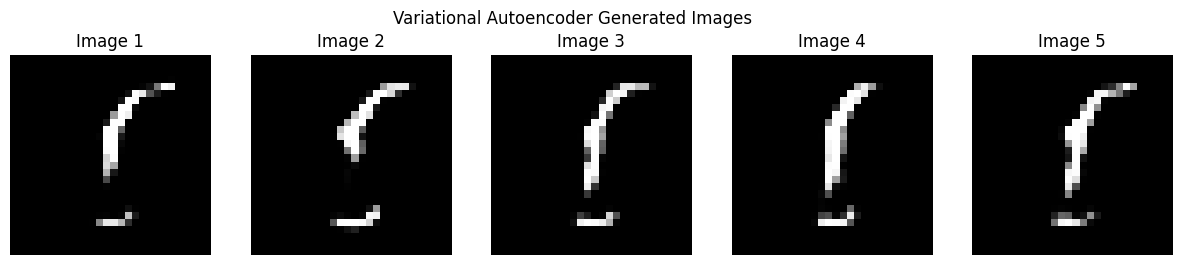

In [13]:
# Generate images
generated_images_vae = decoder_vae.predict(noise_vectors)
generated_images_vae = generated_images_vae.reshape(num_samples, 28, 28)

# Plot images
plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(generated_images_vae[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.suptitle("Variational Autoencoder Generated Images")
plt.show()